In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
PATH = "dataset/indexData.csv"
dataset = pd.read_csv(PATH)

In [3]:
EXCHANGE = "N100"
dataset = dataset[dataset["Index"] == EXCHANGE]
dataset = dataset.fillna(method='ffill')

price = np.array(pd.to_numeric(dataset["Close"]))

In [4]:
TIME_STEPS = 20

train_input = np.array([])
train_output = np.array([])

for index in range(TIME_STEPS, price.size):
    train_input = np.append(
        train_input,
        np.array(price[index - TIME_STEPS: index]),
    )
    train_output = np.append(
        train_output,
        np.array(price[index]),
    )

train_input = train_input.reshape(int(train_input.size / TIME_STEPS), TIME_STEPS, 1)
train_output = train_output.reshape(train_output.size, 1)

In [5]:
model = tf.keras.models.Sequential()

model.add(
    tf.keras.layers.LSTM(
        256,
        input_shape =
        (
            train_input.shape[1],
            train_input.shape[2]
        ),
        activation="relu",
        return_sequences=True)
)

model.add(
    tf.keras.layers.LSTM(
        64,
        activation="relu",
        return_sequences=False
    )
)

model.add(
    tf.keras.layers.Dense(1)
)

model.compile(
    optimizer='Adam',
    loss='mse',
)

model.build(train_input.shape)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 256)           264192    
                                                                 
 lstm_1 (LSTM)               (None, 64)                82176     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 346,433
Trainable params: 346,433
Non-trainable params: 0
_________________________________________________________________


In [6]:
history = model.fit(
    train_input,
    train_output,
    # batch_size=128,
    validation_split=0.2,
    epochs=30,
    verbose=True,
)

Epoch 1/30
138/138 [==============================] - 11s 65ms/step - loss: 1344195.5000 - val_loss: 98300.0156
Epoch 2/30
138/138 [==============================] - 9s 64ms/step - loss: 9862.6553 - val_loss: 3719.6089
Epoch 3/30
138/138 [==============================] - 9s 62ms/step - loss: 1281.4895 - val_loss: 2306.0859
Epoch 4/30
138/138 [==============================] - 9s 62ms/step - loss: 1091.9974 - val_loss: 2066.9478
Epoch 5/30
138/138 [==============================] - 9s 62ms/step - loss: 1041.9806 - val_loss: 2152.4058
Epoch 6/30
138/138 [==============================] - 9s 63ms/step - loss: 1018.7700 - val_loss: 2394.5964
Epoch 7/30
138/138 [==============================] - 9s 65ms/step - loss: 3463.2078 - val_loss: 2445.2236
Epoch 8/30
138/138 [==============================] - 9s 62ms/step - loss: 940.9403 - val_loss: 2122.7422
Epoch 9/30
138/138 [==============================] - 9s 64ms/step - loss: 840.8978 - val_loss: 2042.0435
Epoch 10/30
138/138 [=============

In [7]:
error = int(
    model.evaluate(
        train_input,
        train_output
    )
)

model.save(f"model/{model.loss} {error}.h5")

172/172 [==============================] - 2s 10ms/step - loss: 651.0574


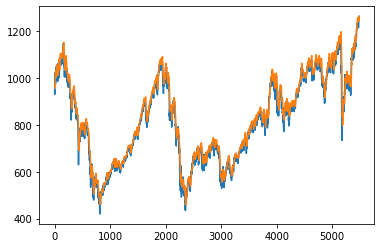

In [8]:
plt.plot(train_output)
plt.plot(
    model.predict(
        train_input,
        verbose=False
    )
)
plt.show()

In [9]:
PREDICTIONS_NUMBER = 365

prediction_input = train_input.copy()
prediction_output = np.array([])

for _ in range(PREDICTIONS_NUMBER):
    prediction = model.predict(
        prediction_input[-1].reshape(1, TIME_STEPS, 1),
        verbose=False
    )
    prediction_output = np.append(
        prediction_output,
        prediction
    )

    new_time_series = prediction_input[-1][1:]
    new_time_series = np.append(new_time_series, [prediction])

    shape = prediction_input.shape

    prediction_input = np.append(
        prediction_input,
        [new_time_series]
    )

    prediction_input = prediction_input.reshape(
        int(prediction_input.shape[0] / shape[1]),
        shape[1],
        shape[2]
    )

prediction_output = prediction_output.reshape(
    PREDICTIONS_NUMBER,
    1
)

prediction_output

array([[1261.1776123 ],
       [1260.44604492],
       [1269.36987305],
       [1276.68811035],
       [1283.84399414],
       [1286.25732422],
       [1286.30175781],
       [1290.4387207 ],
       [1298.84277344],
       [1302.92053223],
       [1310.20263672],
       [1312.52709961],
       [1315.04272461],
       [1321.31762695],
       [1326.29882812],
       [1331.87744141],
       [1337.64013672],
       [1341.04199219],
       [1346.85107422],
       [1352.3092041 ],
       [1357.75268555],
       [1363.40075684],
       [1367.29272461],
       [1371.70898438],
       [1377.39941406],
       [1383.1081543 ],
       [1388.97753906],
       [1394.34277344],
       [1398.75292969],
       [1404.14672852],
       [1409.56872559],
       [1415.33044434],
       [1421.22802734],
       [1426.44702148],
       [1431.78637695],
       [1437.38110352],
       [1442.94641113],
       [1448.82104492],
       [1454.37963867],
       [1459.80419922],
       [1465.51208496],
       [1471.303

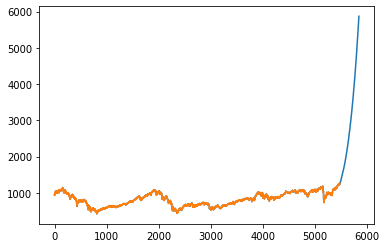

In [10]:
prediction_output = np.append(
    train_output,
    prediction_output
)

plt.plot(prediction_output)
plt.plot(train_output)
plt.show()